In [9]:
#Para instalae:
#conda install -c conda-forge scikit-surprise
#pip install scikit-surprise
#baixar o data set: https://guoguibing.github.io/librec/datasets.html
#Documentação: https://surpriselib.com
import surprise

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#Carregando o dataset:
dataset = pd.read_csv('D:/Github/data-science/machine-learning/segundo-modulo/sistemas-de-recomendacao/ratings.txt', sep=" ", names = ['id_usuario', 'id_filme', 'rating'])

In [24]:
dataset.head(20)

,id_usuario,id_filme,rating
0,1,1,2.0
1,1,2,4.0
2,1,3,3.5
3,1,4,3.0
4,1,5,4.0
5,1,6,3.5
6,1,7,3.5
7,1,8,3.0
8,1,9,2.5
9,1,10,4.0


In [25]:
filmes = len(dataset['id_filme'].unique()) #contagem de filmes no dataset
usuarios = len(dataset['id_usuario'].unique()) #contagem de usuarios no dataset
amostras = dataset.shape[0] #quantidade de avalições
print('Total de filmes: ', filmes)
print('Total de usuários: ', usuarios)
print('Total de amostras: ', amostras)

Total de filmes:  2071
Total de usuários:  1508
Total de amostras:  35497


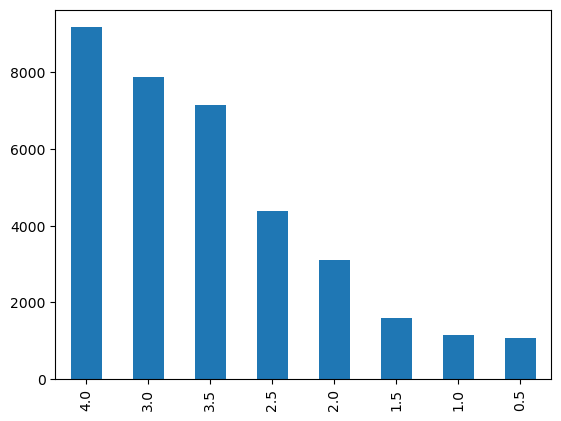

In [26]:
dataset['rating'].value_counts().plot(kind='bar')
plt.show()

In [27]:
menor_rating = dataset['rating'].min()
maior_rating = dataset['rating'].max()
print('Variação de rating: {0} a {1}'.format(menor_rating,maior_rating))

Variação de rating: 0.5 a 4.0


In [29]:
#Redefinindo o range de ratings:
reader = surprise.Reader(rating_scale = (0.5, 4.0))#pode carregar um dataset bult-in também
dataset_surprise = surprise.Dataset.load_from_df(dataset, reader)

In [30]:
#Escolhendo o algoritmo e treinando o modelo
dataset_preenchido = dataset_surprise.build_full_trainset()#criando o dataset de treino
algoritmo = surprise.SVDpp(n_factors=20) #SVD++
algoritmo.fit(dataset_preenchido)

In [36]:
dataset_missing = dataset_preenchido.build_anti_testset()#criando o dataset com as previsões
previsoes = algoritmo.test(dataset_missing)

In [37]:
previsoes[0]

Prediction(uid=1, iid=13, r_ui=3.0028030537791928, est=3.614512344625694, details={'was_impossible': False})

In [39]:
previsoes

[Prediction(uid=1, iid=13, r_ui=3.0028030537791928, est=3.614512344625694, details={'was_impossible': False}),
 Prediction(uid=1, iid=14, r_ui=3.0028030537791928, est=2.8465628145056634, details={'was_impossible': False}),
 Prediction(uid=1, iid=15, r_ui=3.0028030537791928, est=2.983711483291699, details={'was_impossible': False}),
 Prediction(uid=1, iid=16, r_ui=3.0028030537791928, est=3.4090340405775383, details={'was_impossible': False}),
 Prediction(uid=1, iid=17, r_ui=3.0028030537791928, est=3.0795510655933245, details={'was_impossible': False}),
 Prediction(uid=1, iid=18, r_ui=3.0028030537791928, est=3.391805648294389, details={'was_impossible': False}),
 Prediction(uid=1, iid=19, r_ui=3.0028030537791928, est=3.3356979718442665, details={'was_impossible': False}),
 Prediction(uid=1, iid=20, r_ui=3.0028030537791928, est=3.0963167836260337, details={'was_impossible': False}),
 Prediction(uid=1, iid=21, r_ui=3.0028030537791928, est=3.0719321661258143, details={'was_impossible': Fals

In [40]:
len(previsoes)

3087574

In [57]:
#Criando uma função que retona as top-N recomendações para cada usuário
#Essa função irá retornar um dicionário onde as chaves são usuários e os valores são listas de tuplas(filme, rating_previsto)

from collections import defaultdict

def obtem_top_n(previsoes, n=5):
    top_n = defaultdict(list) #Cria um dicionário onde os valores são listas vazias
    for usuario, filme, _, previsao, _ in previsoes:
        top_n[usuario].append((filme, previsao)) #Adiciona os pares de chave:valor ao dicionário
    for usuario, previsoes_usuario in top_n.items():
        previsoes_usuario.sort(key=lambda x: x[1], reverse=True) #Ordena as previsões de rating do maior para o menor
        top_n[usuario] = previsoes_usuario[:n] #Salva somente os n primeiros valores
    return top_n

In [58]:
dic = defaultdict(list)

In [59]:
dic[0]

[]

In [60]:
top_5 = obtem_top_n(previsoes, n=5)

In [61]:
top_5

defaultdict(list,
            {1: [(286, 4.0),
              (705, 3.872508473611635),
              (805, 3.8690497004239113),
              (299, 3.8355556446390584),
              (218, 3.8267901063389096)],
             2: [(286, 3.6476381177680146),
              (805, 3.5168578952453884),
              (689, 3.4965278393408386),
              (299, 3.482548263216822),
              (189, 3.422044798849555)],
             3: [(318, 3.94709709449108),
              (286, 3.861435126854971),
              (11, 3.738541644018858),
              (512, 3.7309862296251337),
              (398, 3.730178810342578)],
             4: [(286, 3.511219633010551),
              (335, 3.3161463517339076),
              (299, 3.296284133600841),
              (363, 3.274106033529545),
              (805, 3.2600082716242507)],
             5: [(286, 3.7702468760679926),
              (805, 3.705286016706348),
              (689, 3.68065799174919),
              (335, 3.6611927260191783),
         

In [63]:
for usuario, previsoes_usuario in top_5.items():
    print(usuario, [filme for (filme, _) in previsoes_usuario])

1 [286, 705, 805, 299, 218]
2 [286, 805, 689, 299, 189]
3 [318, 286, 11, 512, 398]
4 [286, 335, 299, 363, 805]
5 [286, 805, 689, 335, 299]
6 [286, 805, 335, 705, 728]
7 [286, 805, 689, 1091, 705]
8 [286, 335, 805, 297, 705]
9 [286, 805, 658, 335, 689]
10 [286, 805, 297, 335, 563]
11 [286, 805, 318, 335, 1091]
12 [286, 335, 805, 658, 299]
13 [805, 563, 705, 286, 363]
14 [286, 335, 689, 702, 299]
15 [286, 805, 705, 335, 189]
16 [805, 286, 335, 318, 705]
17 [286, 805, 705, 307, 335]
18 [286, 805, 705, 675, 335]
19 [286, 805, 335, 297, 705]
20 [805, 286, 705, 1118, 335]
21 [52, 68, 96, 126, 167]
22 [68, 126, 144, 189, 197]
23 [286, 299, 805, 689, 658]
24 [286, 805, 675, 705, 335]
25 [286, 335, 805, 705, 299]
26 [286, 307, 805, 398, 335]
27 [286, 805, 363, 696, 675]
28 [286, 805, 335, 689, 299]
29 [689, 398, 805, 696, 335]
30 [286, 805, 363, 770, 696]
31 [286, 805, 335, 318, 705]
32 [286, 335, 705, 805, 563]
33 [286, 805, 335, 363, 425]
34 [286, 805, 689, 658, 770]
35 [286, 805, 307, 318, 6

In [64]:
# Fazendo uma previsão somente para um usuário e filme específicos:
previsao_usuario = algoritmo.predict(uid=30, iid=87)
rating = previsao_usuario.est
print(rating)

2.4879887762286703


In [66]:
# Validando o modelo:
from surprise.model_selection import train_test_split
dataset_treino, dataset_teste = train_test_split(dataset_surprise, test_size=0.3)

algoritmo = surprise.SVDpp(n_factors=20)
algoritmo.fit(dataset_preenchido)
previsoes_gerais = algoritmo.test(dataset_teste)

In [67]:
previsoes_gerais

[Prediction(uid=178, iid=246, r_ui=1.0, est=2.0509339521679806, details={'was_impossible': False}),
 Prediction(uid=1461, iid=246, r_ui=3.5, est=3.035184950833076, details={'was_impossible': False}),
 Prediction(uid=262, iid=241, r_ui=4.0, est=3.5475274188392443, details={'was_impossible': False}),
 Prediction(uid=817, iid=9, r_ui=2.0, est=3.297918511922011, details={'was_impossible': False}),
 Prediction(uid=485, iid=8, r_ui=3.0, est=3.415046746138396, details={'was_impossible': False}),
 Prediction(uid=488, iid=219, r_ui=2.0, est=2.95037777239559, details={'was_impossible': False}),
 Prediction(uid=452, iid=241, r_ui=4.0, est=3.107769231512343, details={'was_impossible': False}),
 Prediction(uid=764, iid=810, r_ui=0.5, est=2.783365544202401, details={'was_impossible': False}),
 Prediction(uid=1193, iid=206, r_ui=4.0, est=3.256970521307673, details={'was_impossible': False}),
 Prediction(uid=88, iid=207, r_ui=2.5, est=2.4676970544516865, details={'was_impossible': False}),
 Prediction

In [68]:
from surprise import accuracy
accuracy.rmse(previsoes_gerais)

RMSE: 0.6463


0.6463211628542267

In [73]:
#Ajustando os parâmetros:
param_grid = {'lr_all': [.007, .01, 0.05, 0.001], 'reg_all': [0.02, 0.1, 1.0, 0.005]}
surprise_grid = surprise.model_selection.GridSearchCV(surprise.SVDpp, param_grid, measures=['rmse'], cv=3, n_jobs=-1)# measures=['rmse', 'mae']
surprise_grid.fit(dataset_surprise)
print(surprise_grid.best_params['rmse'])

{'lr_all': 0.007, 'reg_all': 0.1}


In [74]:
#Mostrando os dados vizinhos
from surprise import KNNBasic #Função responsável para cálcular vizinhos próximos

dataset_preenchido = dataset_surprise.build_full_trainset()
#distancia do coseno 
#'user_based': False para os filmes 
#'user_based': True para os usuários
algoritmo = KNNBasic(sim_options={'name' : 'cosine', 'user_based': False})
# 'name' é o algoritmo de similaridade, 'user_based' ==True é para calcular a similaridade entre usuários
algoritmo.fit(dataset_preenchido)

#Mostrando os k vizinhos mais próximos:
vizinhos = algoritmo.get_neighbors(343, k=10)#filme 343 e quantidade de 10 vizinhos mais próximos

print('Os 10 filmes vizinhos para o id escolhido são:')
for filme in vizinhos:
    print(filme)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Os 10 filmes vizinhos para o id escolhido são:
58
90
102
126
147
159
168
171
193
236
